In [10]:
import cv2 as cv
import os, random
import matplotlib.pyplot as plt
import numpy as np
import textwrap
import h5py
import textwrap

# CPI images

## original image

In [52]:
habit = ['agg', 'bullet', 'column', 'rimed', 'compact_irreg']
cpi_base_dir = '/home/vanessa/hulk/cocpit/cpi_data/training_datasets/v3.1.0/hand_labeled_noaug'
cpi_paths = {}

def get_random_files(dir_path, n=5):
    # Get full paths to all files in the directory (excluding subdirectories)
    all_files = [os.path.join(dir_path, f) for f in os.listdir(dir_path)
                 if os.path.isfile(os.path.join(dir_path, f))]
    
    # Sample up to n random files
    return random.sample(all_files, min(n, len(all_files)))

for h in habit:
    dir_path = os.path.join(cpi_base_dir, h)
    filepaths = get_random_files(dir_path, 5)
    cpi_paths[h] = filepaths    

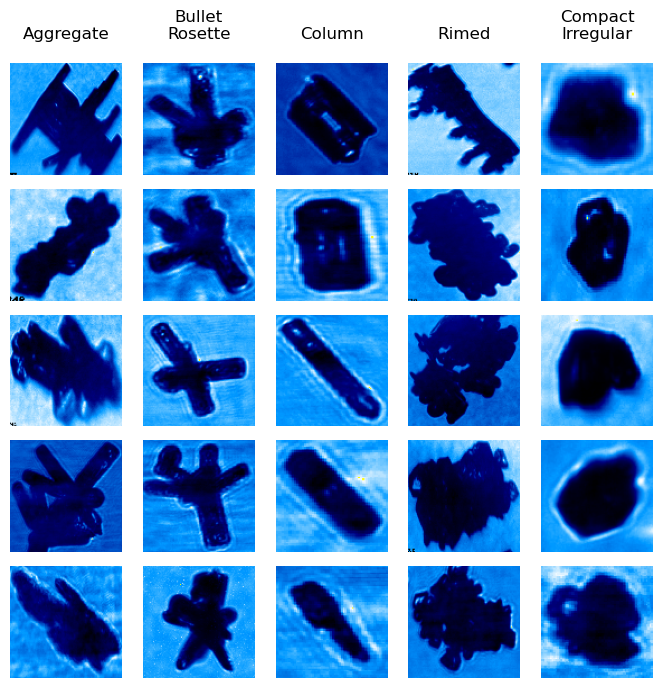

In [53]:
TARGET_SIZE = (100, 100)  # width, height

fig, axes = plt.subplots(5, 5, figsize=(7, 7))
col_labels = ['Aggregate', 'Bullet Rosette', 'Column', 'Rimed', 'Compact Irregular']
wrapped_labels = [textwrap.fill(label, width=12) for label in col_labels]

# Plot images
for col_idx, (habit, paths) in enumerate(cpi_paths.items()):
    for row_idx, img_path in enumerate(paths[:5]):
        img = cv.imread(img_path)
        if img is None:
            print(f"Warning: could not read image {img_path}")
            continue
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, TARGET_SIZE)
        ax = axes[row_idx, col_idx]
        ax.imshow(img)
        ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.90, left=0.05)  # Make room for labels

# Center column labels using axes positions
for col_idx, label in enumerate(wrapped_labels):
    ax = axes[0, col_idx]
    pos = ax.get_position()
    x = pos.x0 + 0.5 * (pos.x1 - pos.x0)
    plt.figtext(
        x, 0.93, label, ha='center', va='bottom', fontsize=12
    )
# save fig
savedir = '/home/jko/ice3d/output/figs'
savepath = os.path.join(savedir, 'cpi-array-10.png')
plt.savefig(savepath, dpi=150, bbox_inches='tight')

plt.show()

## masked

['/home/vanessa/hulk/cocpit/cpi_data/training_datasets/v3.1.0/hand_labeled_noaug/bullet/2004_1017_223810_98_35.png', '/home/vanessa/hulk/cocpit/cpi_data/training_datasets/v3.1.0/hand_labeled_noaug/bullet/2004_1017_221622_19_18.png', '/home/vanessa/hulk/cocpit/cpi_data/training_datasets/v3.1.0/hand_labeled_noaug/bullet/2004_1017_220511_388_0.png', '/home/vanessa/hulk/cocpit/cpi_data/training_datasets/v3.1.0/hand_labeled_noaug/bullet/2004_1017_223859_400_27.png', '/home/vanessa/hulk/cocpit/cpi_data/training_datasets/v3.1.0/hand_labeled_noaug/bullet/2004_1017_220511_388_35.png']


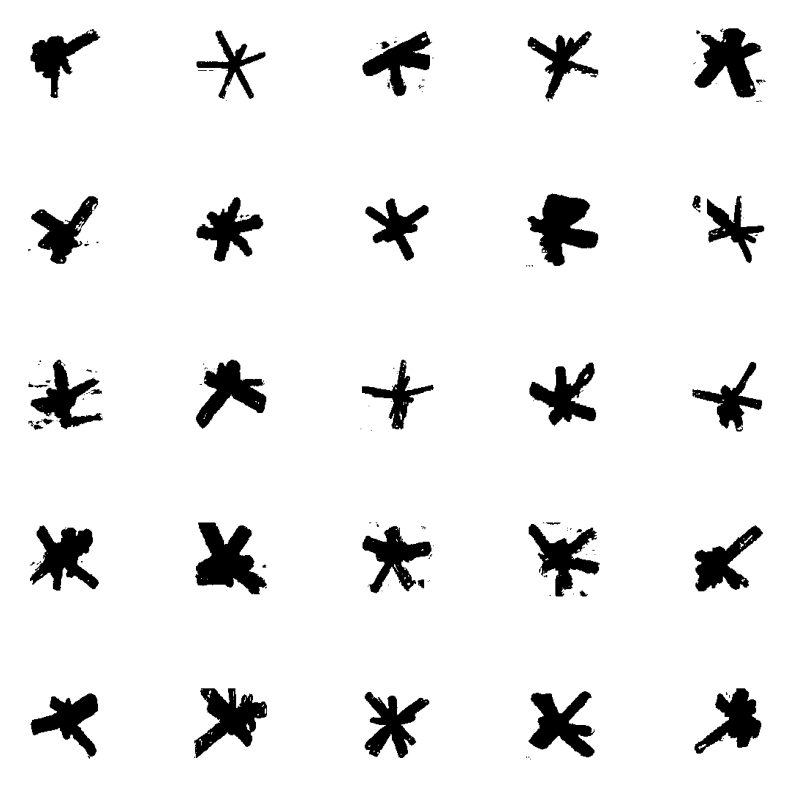

In [91]:
cpi_base_dir = '/home/vanessa/hulk/cocpit/cpi_data/training_datasets/v3.1.0/hand_labeled_noaug'
def get_random_files(dir_path, n=25):
    # Get full paths to all files in the directory (excluding subdirectories)
    all_files = [os.path.join(dir_path, f) for f in os.listdir(dir_path)
                 if os.path.isfile(os.path.join(dir_path, f))]
    # Sample up to n random files
    return random.sample(all_files, min(n, len(all_files)))

# Only sample from the 'bullet' category
bullet_dir = os.path.join(cpi_base_dir, 'bullet')
bullet_paths = get_random_files(bullet_dir, 25)

# bullet_paths now contains up to 25 random image paths from the bullet category
print(bullet_paths[:5])

TARGET_SIZE = (100,100)  # Make the image smaller
PAD = 25                # Padding (pixels) around the image in each subplot
PADDED_SIZE = (TARGET_SIZE[0] + 2*PAD, TARGET_SIZE[1] + 2*PAD)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for idx, img_path in enumerate(bullet_paths[:25]):
    row_idx = idx // 5
    col_idx = idx % 5
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Warning: could not read image {img_path}")
        continue
    img = cv.resize(img, TARGET_SIZE)
    _, binary_mask = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    # Create a padded canvas and place the image in the center
    padded_img = np.ones(PADDED_SIZE, dtype=np.uint8) * 255  # white background
    padded_img[PAD:PAD+TARGET_SIZE[0], PAD:PAD+TARGET_SIZE[1]] = binary_mask
    ax = axes[row_idx, col_idx]
    ax.imshow(padded_img, cmap='gray')
    ax.axis('off')

fig.subplots_adjust(wspace=0.5, hspace=0.5)

# save fig
savedir = '/home/jko/ice3d/output/figs/cpi-array-masked/'
savepath = os.path.join(savedir, 'cpi-array-masked-10.png')
plt.savefig(savepath, dpi=150, bbox_inches='tight')

plt.show()

In [76]:
# import cv2 as cv
# import matplotlib.pyplot as plt

# TARGET_SIZE = (100, 100)  # width, height
# # fig, axes = plt.subplots(5, 5, figsize=(7, 7))
# fig, axes = plt.subplots(5, 5, figsize=(7, 7), constrained_layout=True)

# # Plot images as binary masks
# for idx, img_path in enumerate(bullet_paths[:25]):
#     row_idx = idx // 5
#     col_idx = idx % 5
#     img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)  # Read as grayscale
#     if img is None:
#         print(f"Warning: could not read image {img_path}")
#         continue
#     img = cv.resize(img, TARGET_SIZE)
#     # Apply Otsu's thresholding to get a binary mask
#     _, binary_mask = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
#     ax = axes[row_idx, col_idx]
#     ax.imshow(binary_mask, cmap='gray')
#     ax.axis('off')

# # # plt.tight_layout()
# # plt.subplots_adjust(
# #     top=0.90,    # Decrease to add more space at the top
# #     bottom=0.1, # Increase to add more space at the bottom
# #     left=0.1,   # Increase to add more space on the left
# #     right=0.9,  # Decrease to add more space on the right
# #     wspace=1.0, 
# #     hspace=1.0
# # )

# fig.set_constrained_layout_pads(w_pad=1.0, h_pad=1.0, hspace=1.0, wspace=1.0)

# # # save fig
# # savedir = '/home/jko/ice3d/output/figs/cpi-array-masked/'
# # savepath = os.path.join(savedir, 'cpi-array-masked-01.png')
# # plt.savefig(savepath, dpi=150, bbox_inches='tight')

# plt.show()

# Synthetic crystals

In [7]:
filedir = '/home/jko/synth-ros-data/imgs-ml-ready/shuffled_small'
filename = 'default_shuffled_small.h5'
filepath = os.path.join(filedir, filename)

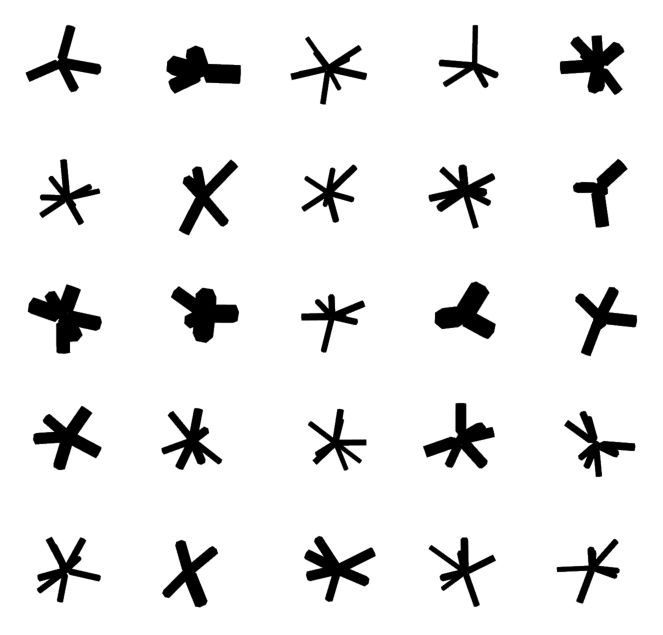

In [86]:
# get random 25 images from h5 file and plot 5x5 array
N = 25
with h5py.File(filepath, 'r') as f: 
    imgs = f['images']
    n_imgs_total = imgs.shape[0]
    idx = np.random.choice(n_imgs_total, N, replace=False)
    idx_sorted = np.sort(idx)
    imgs_subset = imgs[idx_sorted]  # shape: (N, H, W) for single-channel images

# Assume images is your (25, 224, 224) numpy array
# images = np.load('your_images.npy')  # Example loading
fig, axes = plt.subplots(5, 5, figsize=(7, 7))
for idx in range(25):
    row = idx // 5
    col = idx % 5
    ax = axes[row, col]
    ax.imshow(imgs_subset[idx], cmap='gray_r')
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.90, left=0.05)  # Adjust as needed

# Save figure
savedir = '/home/jko/ice3d/output/figs/synth-array/'
os.makedirs(savedir, exist_ok=True)
savepath = os.path.join(savedir, 'synth-array-10.png')
plt.savefig(savepath, dpi=150, bbox_inches='tight')

plt.show()